# HR Analytics: Job Change of Data Scientists

Задача состоит в следующем: по заданным характеристикам предсказать насколько работник действительно хочет работать.  

In [261]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

## 1. Загружаем данные

In [262]:
train_doc = "https://raw.githubusercontent.com/sDismuss/machine_learning/main/aug_train.csv"
test_doc = "https://raw.githubusercontent.com/sDismuss/machine_learning/main/aug_test.csv"
y_doc = "https://raw.githubusercontent.com/sDismuss/machine_learning/main/sample_submission.csv"

X_train = pd.read_csv(train_doc)
X_test = pd.read_csv(test_doc)

### Мелкие тесты

In [263]:
X_train.shape

(19158, 14)

In [264]:
X_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


## 2. Визуализация данных

In [265]:
X_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [266]:
corr_mat = X_train.corr()
corr_mat

,enrollee_id,city_development_index,training_hours,target
enrollee_id,1.000000,-0.040455,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.001920,-0.341665
training_hours,0.000998,0.001920,1.000000,-0.021577
target,0.049475,-0.341665,-0.021577,1.000000


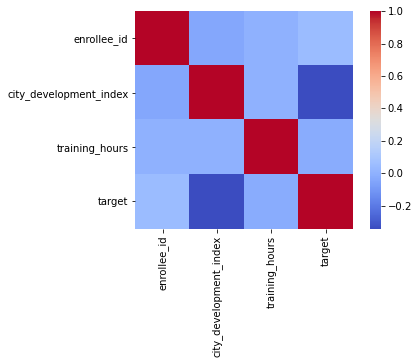

In [267]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

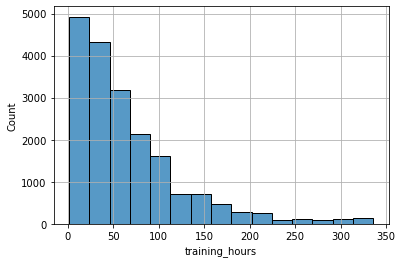

In [268]:
sns.histplot(X_train['training_hours'], bins=15)
plt.grid()
pass

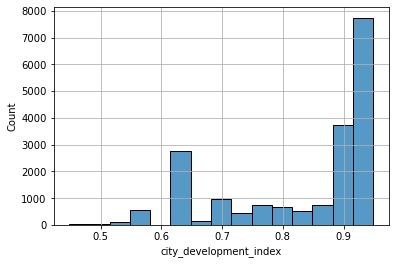

In [269]:
sns.histplot(X_train['city_development_index'], bins=15)
plt.grid()
pass

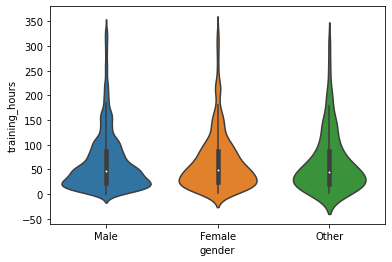

In [270]:
sns.violinplot(x="gender", y="training_hours", data=X_train)
pass

### Проверка нацеленности относительно пола

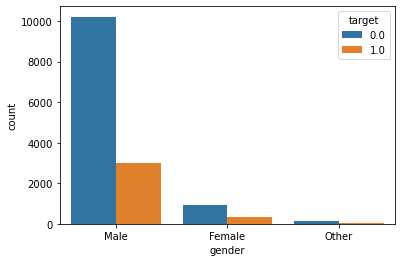

In [271]:
sns.countplot(x='gender', order=X_train['gender'].value_counts().index, hue='target', data=X_train)
pass

### Визуализация отношений между признаками

No handles with labels found to put in legend.


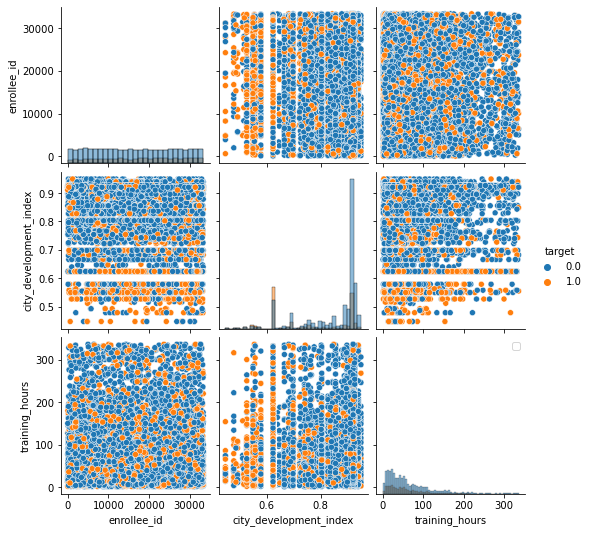

In [272]:
sns.pairplot(X_train, hue='target', diag_kind='hist')
plt.legend()
pass

## 3. Чистим пустые значения

In [273]:
X_train.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [274]:
X_train.fillna(X_train.median(axis = 0), axis=0 , inplace=True)

X_train['gender'].fillna(X_train['gender'].mode().iloc[0], inplace=True)
X_train['enrolled_university'].fillna(X_train['enrolled_university'].mode().iloc[0], inplace=True)
X_train['education_level'].fillna(X_train['education_level'].mode().iloc[0], inplace=True)
X_train['major_discipline'].fillna(X_train['major_discipline'].mode().iloc[0], inplace=True)
X_train['experience'].fillna(X_train['experience'].mode().iloc[0], inplace=True)
X_train['company_size'].fillna(X_train['company_size'].mode().iloc[0], inplace=True)
X_train['company_type'].fillna(X_train['company_type'].mode().iloc[0], inplace=True)
X_train['last_new_job'].fillna(X_train['last_new_job'].mode().iloc[0], inplace=True)

In [275]:
X_train.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

## 4. Нормализация

In [276]:
data_stand = (X_train - X_train.mean(axis = 0))/X_train.std(axis = 0)
data_stand.describe()

,city_development_index,enrollee_id,target,training_hours
count,1.915800e+04,1.915800e+04,1.915800e+04,1.915800e+04
mean,-6.604032e-14,-7.548682e-17,-4.583219e-16,-1.047057e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.087245e+00,-1.754768e+00,-5.763307e-01,-1.071737e+00
25%,-7.202232e-01,-8.653135e-01,-5.763307e-01,-7.054276e-01
50%,6.010939e-01,1.114170e-02,-5.763307e-01,-3.058170e-01
75%,7.389000e-01,8.625353e-01,-5.763307e-01,3.768512e-01
max,9.739809e-01,1.716321e+00,1.735024e+00,4.506161e+00


## 5. Обработка категориальных признаков

### Переводим object в category

In [277]:
print(X_train["gender"].dtype)
print(X_train["relevent_experience"].dtype)
print(X_train["enrolled_university"].dtype)
print(X_train["education_level"].dtype)
print(X_train["major_discipline"].dtype)
print(X_train["experience"].dtype)
print(X_train["company_size"].dtype)
print(X_train["company_type"].dtype)
print(X_train["last_new_job"].dtype)

object
object
object
object
object
object
object
object
object


In [278]:
X_train["gender"] = X_train["gender"].astype('category')
X_train["relevent_experience"] = X_train["relevent_experience"].astype('category')
X_train["enrolled_university"] = X_train["enrolled_university"].astype('category')
X_train["education_level"] = X_train["education_level"].astype('category')
X_train["major_discipline"] = X_train["major_discipline"].astype('category')
X_train["experience"] = X_train["experience"].astype('category')
X_train["company_size"] = X_train["company_size"].astype('category')
X_train["company_type"] = X_train["company_type"].astype('category')
X_train["last_new_job"] = X_train["last_new_job"].astype('category')

In [279]:
print(X_train["gender"].dtype)
print(X_train["relevent_experience"].dtype)
print(X_train["enrolled_university"].dtype)
print(X_train["education_level"].dtype)
print(X_train["major_discipline"].dtype)
print(X_train["experience"].dtype)
print(X_train["company_size"].dtype)
print(X_train["company_type"].dtype)
print(X_train["last_new_job"].dtype)

category
category
category
category
category
category
category
category
category


### Делаем категориальные признаки бинарными

In [280]:
gender_dummies = pd.get_dummies(X_train["gender"])

X_train = pd.concat((X_train, gender_dummies), axis=1)
X_train = X_train.drop(["gender"], axis=1)

In [281]:
relevent_experience_dummies = pd.get_dummies(X_train["relevent_experience"])

X_train = pd.concat((X_train, relevent_experience_dummies), axis=1)
X_train = X_train.drop(["relevent_experience"], axis=1)

In [282]:
enrolled_university_dummies = pd.get_dummies(X_train["enrolled_university"])

X_train = pd.concat((X_train, enrolled_university_dummies), axis=1)
X_train = X_train.drop(["enrolled_university"], axis=1)

In [283]:
education_level_dummies = pd.get_dummies(X_train["education_level"])

X_train = pd.concat((X_train, education_level_dummies), axis=1)
X_train = X_train.drop(["education_level"], axis=1)

In [284]:
major_discipline_dummies = pd.get_dummies(X_train["major_discipline"])

X_train = pd.concat((X_train, major_discipline_dummies), axis=1)
X_train = X_train.drop(["major_discipline"], axis=1)

In [285]:
experience_dummies = pd.get_dummies(X_train["experience"])

X_train = pd.concat((X_train, experience_dummies), axis=1)
X_train = X_train.drop(["experience"], axis=1)

In [286]:
company_size_dummies = pd.get_dummies(X_train["company_size"])

X_train = pd.concat((X_train, company_size_dummies), axis=1)
X_train = X_train.drop(["company_size"], axis=1)

In [287]:
company_type_dummies = pd.get_dummies(X_train["company_type"])

X_train = pd.concat((X_train, company_type_dummies), axis=1)
X_train = X_train.drop(["company_type"], axis=1)

In [288]:
last_new_job_dummies = pd.get_dummies(X_train["last_new_job"])

X_train = pd.concat((X_train, last_new_job_dummies), axis=1)
X_train = X_train.drop(["last_new_job"], axis=1)

## 6. Разбить данные

In [289]:
X_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'training_hours',
       'target', 'Female', 'Male', 'Other', 'Has relevent experience',
       'No relevent experience', 'Full time course', 'Part time course',
       'no_enrollment', 'Graduate', 'High School', 'Masters', 'Phd',
       'Primary School', 'Arts', 'Business Degree', 'Humanities', 'No Major',
       'Other', 'STEM', '1', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '2', '20', '3', '4', '5', '6', '7', '8', '9', '<1', '>20',
       '10/49', '100-500', '1000-4999', '10000+', '50-99', '500-999',
       '5000-9999', '<10', 'Early Stage Startup', 'Funded Startup', 'NGO',
       'Other', 'Public Sector', 'Pvt Ltd', '1', '2', '3', '4', '>4', 'never'],
      dtype='object')

In [290]:
y_train = X_train["target"]
X_train = X_train.drop(["enrollee_id", "city", "target"], axis=1)

In [291]:
print(X_train)
print(y_train)

       city_development_index  training_hours  Female  Male  Other  \
0                       0.920              36       0     1      0   
1                       0.776              47       0     1      0   
2                       0.624              83       0     1      0   
3                       0.789              52       0     1      0   
4                       0.767               8       0     1      0   
...                       ...             ...     ...   ...    ...   
19153                   0.878              42       0     1      0   
19154                   0.920              52       0     1      0   
19155                   0.920              44       0     1      0   
19156                   0.802              97       0     1      0   
19157                   0.855             127       0     1      0   

       Has relevent experience  No relevent experience  Full time course  \
0                            1                       0                 0   
1      

In [292]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(14368, 4790)

## 7. Метод ближайших соседей

#### Переобучение

In [293]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

error_train  = np.mean(y_train  != y_train_pred)
error_test  = np.mean(y_test  != y_test_pred)

print(error_train)
print(error_test)

0.002853563474387528
0.3346555323590814


In [294]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

error_train  = np.mean(y_train  != y_train_pred)
error_test  = np.mean(y_test  != y_test_pred)

print(error_train)
print(error_test)

0.16251391982182628
0.27139874739039666


In [295]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

error_train  = np.mean(y_train  != y_train_pred)
error_test  = np.mean(y_test  != y_test_pred)

print(error_train)
print(error_test)

0.19578229398663696
0.2828810020876827


In [296]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9, p=1)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

error_train  = np.mean(y_train  != y_train_pred)
error_test  = np.mean(y_test  != y_test_pred)

print(error_train)
print(error_test)

0.21165089086859687
0.262839248434238


In [297]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15, p=1)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

error_train  = np.mean(y_train  != y_train_pred)
error_test  = np.mean(y_test  != y_test_pred)

print(error_train)
print(error_test)

0.22515311804008908
0.2521920668058455


### Репорт по лучшему из вариантов

In [298]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.96      0.87     10797
         1.0       0.65      0.21      0.32      3571

    accuracy                           0.77     14368
   macro avg       0.72      0.59      0.59     14368
weighted avg       0.75      0.77      0.73     14368



In [299]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.95      0.85      3584
         1.0       0.50      0.16      0.24      1206

    accuracy                           0.75      4790
   macro avg       0.63      0.55      0.54      4790
weighted avg       0.70      0.75      0.69      4790



In [300]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[10389,   408],
       [ 2827,   744]], dtype=int64)

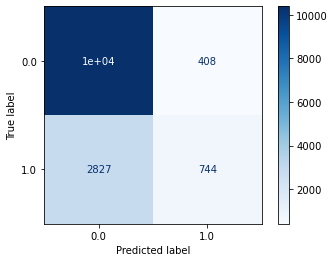

In [301]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_train, y_train, cmap=plt.cm.Blues)
pass

In [302]:
confusion_matrix(y_test, y_test_pred)

array([[3394,  190],
       [1018,  188]], dtype=int64)

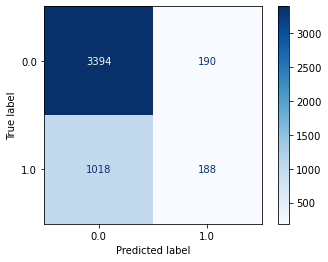

In [303]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues)
pass

## 8. Выводы

В ходе данной работы были применены на практике следующие темы:

1. Подключение библиотек Python
2. Подключение тренировочных баз данных
3. Исследование входящих данных
4. Борьба с пропущенными значениями
5. Перевод категориальных значений в биномиальные значения
6. Применение метода ближайших соседей для предсказания значений

Значения метода kNN:  

| TYPE  | k  | ERROR   |
|:-----:|:--:|:-------:|
| train | 1  | ~0.0028 |
| train | 2  | ~0.1625 |
| train | 5  | ~0.1958 |
| train | 9  | ~0.2116 |
| train | 15 | ~0.2251 |
|       |    |         |
| test  | 1  | ~0.3346 |
| test  | 1  | ~0.2714 |
| test  | 1  | ~0.2829 |
| test  | 1  | ~0.2628 |
| test  | 1  | ~0.2522 |

**Выводы по таблице**  
При увеличении количества соседей ошибка на тренировочной выборке увеличивается. Однако, на тестируемой, наоборот, уменьшается.  
Смею предположить, что Байесовская ошибка находится в пределе от 0.22 до 0.25.